# Dowdle's Titanic Survival Prediction
**Author:** Brittany Dowdle  
**Date:** March 26, 2025  
**Objective:** Use the data you inspected, explored, and cleaned previously. Use 3 models to predict survival on the Titanic from various input features. Compare model performance.


## Introduction
This project uses the Titanic dataset to predict survival based on features such as class, sex, and family size. We will train multiple models, evaluate performance using key metrics, and create visualizations to interpret the results. We use three common classification models in this lab: Decision Tree Classifier (DT), Support Vector Machine (SVM), and Neural Network (NN).
****

## Imports
In the code cell below, import the necessary Python libraries for this notebook. All imports should be at the top of the notebook. 

In [2]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
from pandas.plotting import scatter_matrix

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import for splitting data into training and test sets
from sklearn.model_selection import StratifiedShuffleSplit

# Import classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Import performance metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

****
## Section 1. Import and Inspect the Data

We don't need to inspect the data as we've already done that and are familiar with the data. 

In [3]:
# Load the data
titanic = sns.load_dataset('titanic')

****

## Section 2. Data Exploration and Preparation
We might need to clean it or do some feature engineering. Learning to figure out what you need is a key skill.

### 2.1 Handle Missing Values and Clean Data

- Impute missing values for age using the median.
- Fill in missing values for embark_town using the mode

In [4]:
# Impute missing values for age using the median 
titanic.fillna({'age': titanic['age'].median()}, inplace=True)

# Fill missing values for embark_town using the mode
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.2 Feature Engineering

- Add family_size - number of family members on board.
- Convert categorical "sex" to numeric.
- Convert categorical "embarked" to numeric.
- Binary feature - convert "alone" to numeric.

In [5]:
# Create family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Convert categorical to numeric
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Convert binary to numeric
titanic['alone'] = titanic['alone'].astype(int)

****

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target
Use three input cases like the example.

>First:
>
>input features: alone
>
>target: survived
>
>Second:
>
>input features - age
>
>target: survived
>
>Third:
>
>input features -  age and family_size
>
>target: survived

### 3.2 Define X and y

- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Use comments to run a single case at a time

In [71]:
# Pro tip: Double brackets [[ ]]] makes a 2D DataFrame. Single brackets [ ] make a 1D Series.
# Case 1: alone only 
# X = titanic[['alone']]
# y = titanic['survived']

# Case 2: age only
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: age + family_size
X = titanic[['age', 'family_size']]
y = titanic['survived']

# Print the first few rows to confirm feature selection
print("Selected Features:")
print(X.head())

print("\nTarget Variable:")
print(y.head())

Selected Features:
    age  family_size
0  22.0            2
1  38.0            2
2  26.0            1
3  35.0            2
4  35.0            1

Target Variable:
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


### Reflection 3:

1) Why are these features selected? **Alone: Determines who a passenger was traveling with, which could impact their ability to receive help or access lifeboats. Age: Younger passengers, especially children, were prioritized for lifeboats, while older passengers may have faced mobility challenges. Family Size: Traveling with family could improve survival chances due to mutual assistance, but larger families might have struggled to evacuate together.**
2) Are there any features that are likely to be highly predictive of survival? **Yes. Sex: Women had much higher survival rates, Pclass: First-class passengers had better access to lifeboats, Fare: Higher fares correlated with better survival chances, Embarked: Port of embarkation might reflect social/economic factors.**

****

## Section 4. Train a Classification Model (Decision Tree)


### 4.1 Split the Data
Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [72]:
# Define how many splits, % of data for testing, and ensure reproducibility
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

# Split data into a training set and a test set
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Show set sizes
print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 712
Test size: 179


### 4.2 Create and Train Model (Decision Tree)
Create and train a decision tree model with no random initializer argument.

In [73]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Show depth for confirmation
print(f"Tree Depth: {tree_model.get_depth()}")

Tree Depth: 21


### 4.3 Predict and Evaluate Model Performance

- Evaluate model performance on training data.
- Evaluate model performance on test data.

In [74]:
# Training data (X_train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [75]:
# Test data (X_test)
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



### 4.4 Report Confusion Matrix (as a heatmap)
Plot a confusion matrix.

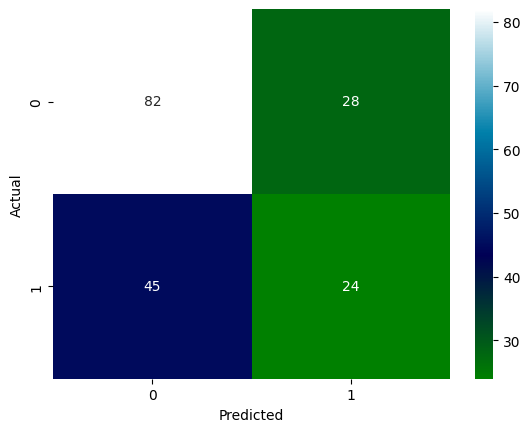

In [76]:
# Create matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='ocean')

# Labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Show the plot
plt.tight_layout
plt.show()  

### 4.5 Report Decision Tree Plot
Plot the decision tree model. Give the plotter the names of the features and the names of the categories for the target. Save the image to use it in other places.

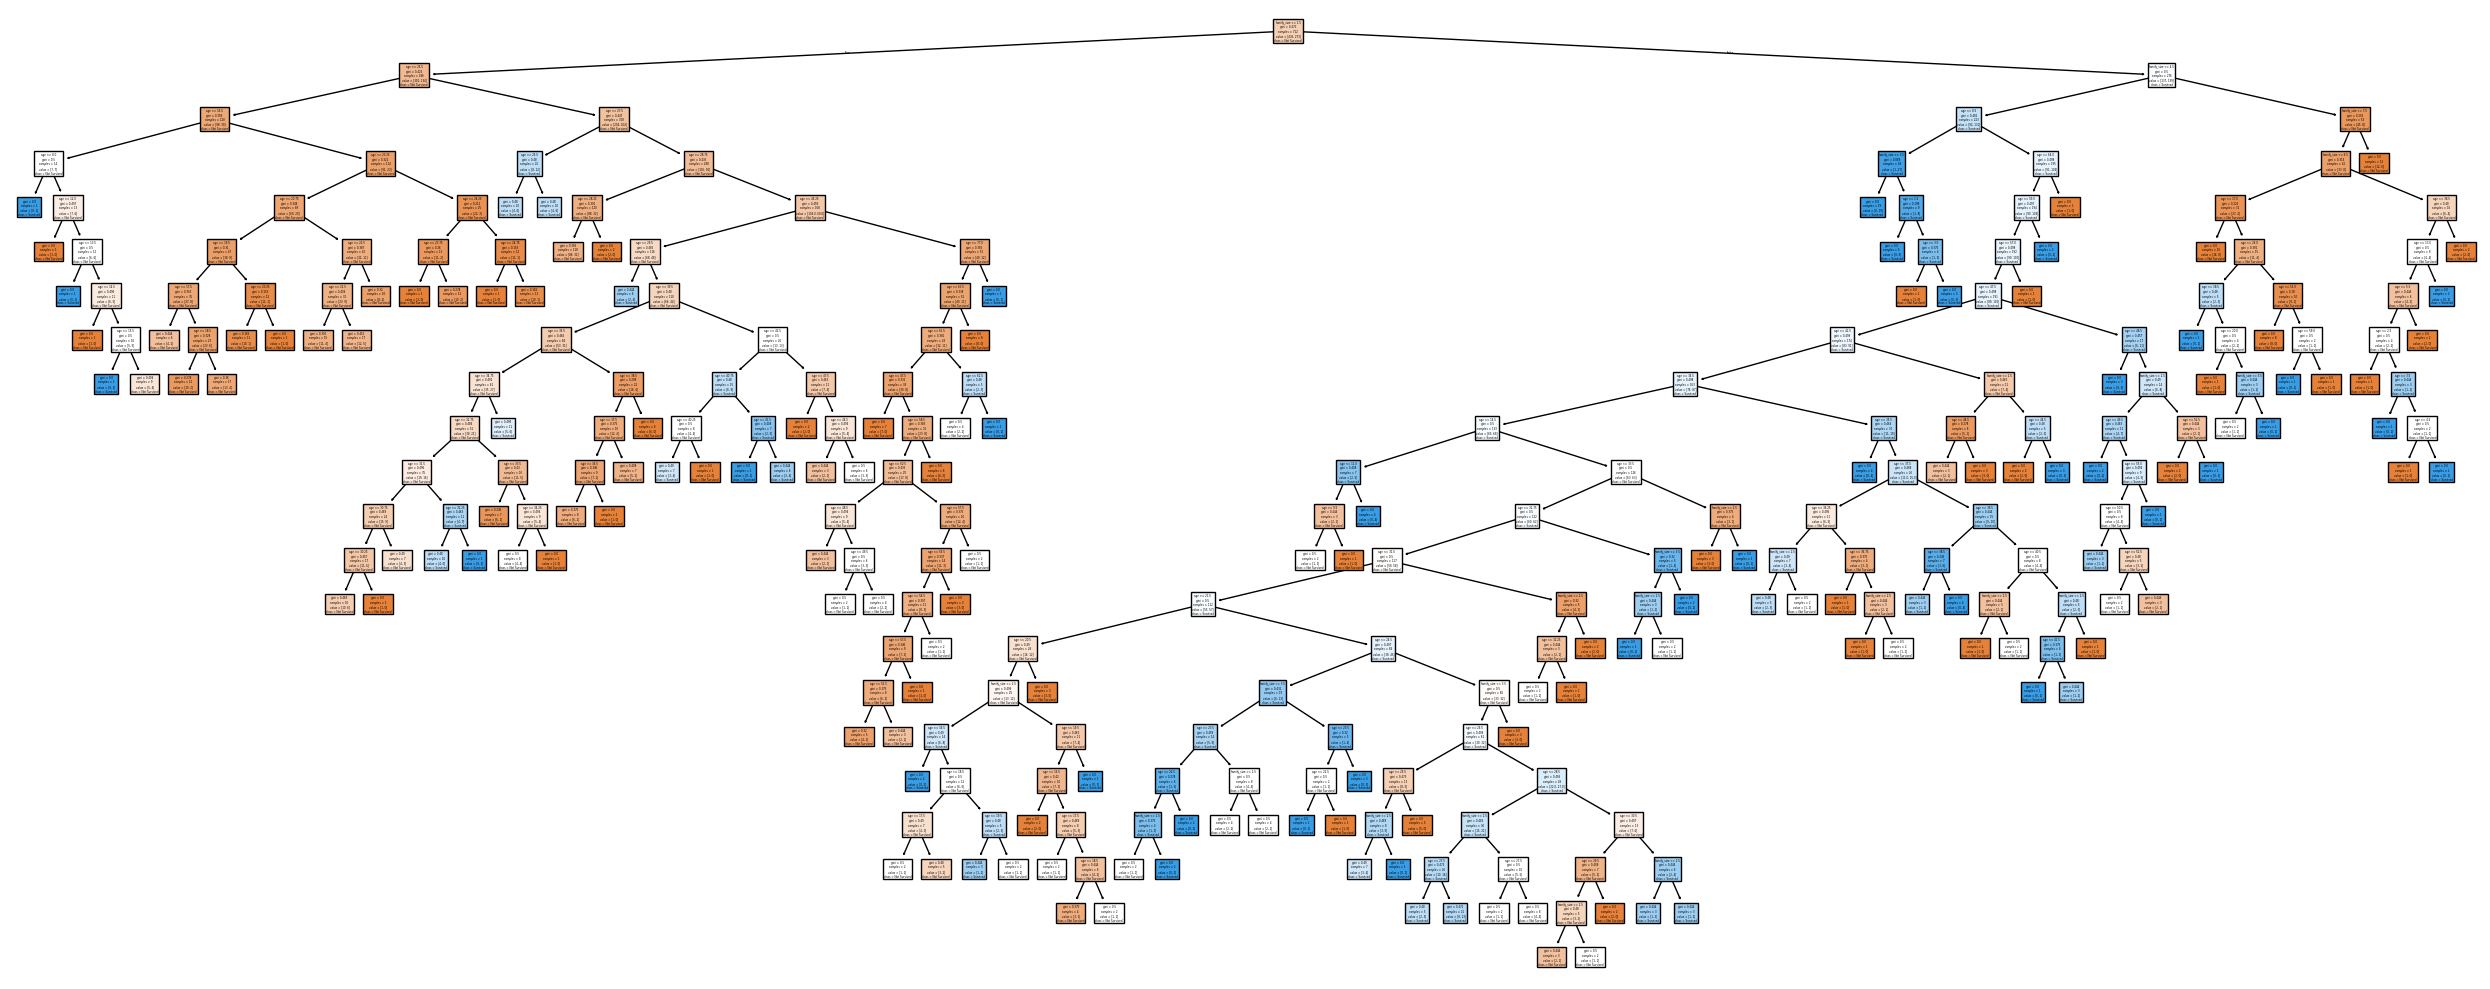

In [77]:
# Create the tree
fig, ax = plt.subplots(figsize=(25, 10))  # Define figure and axis
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, ax=ax)

# Show the plot
plt.tight_layout()
plt.show()

# Save the image
fig.savefig("decision_tree_titanic_c3.png", bbox_inches="tight")  # Save without cutting off parts

### Repeat for All 3 Cases
For each different case, redefine the input features in Section 3 (comment out the old case inputs X and target y and uncomment the new case inputs X and target y), then re-run Sections 4 and 5 for each case. Record your results in a Markdown table.

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                   | Case 2 | age | 61% | 58% | 61% | 55% | - |
|                   | Case 3 | age + family_size | 59% | 57% | 59% | 58% | - |

### Reflection 4:
1. How well did the different cases perform? **Case 1 (alone) performed the best with 63% accuracy and balanced precision/recall. Case 2 (age only) F1-score was lower, meaning it struggled to balance precision and recall. Case 3 (age + family_size) performed the worst suggesting that adding family_size didn’t improve predictions.**
2. Are there any surprising results? **Family size did not improve the model even though it was speculated that having family aboard affects survival, but it didn’t help much here. Low overall accuracy, none of the models exceeded 65%, meaning these features alone are weak predictors.**
3. Which inputs worked better? **Alone was the strongest predictor. Alone performed better than age which suggests that whether someone traveled alone was more indicative of survival than their age.**

****

## Section 5. Compare Alternative Models (SVC, NN)
In a Support Vector Machine, the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes. If the data is not linearly separable, changing the kernel can help the model find a better decision boundary. Commenting the options in and out in the code can be helpful. The analyst decides which to use based on their understanding of the results. 

In [78]:
# RBF Kernel (default) - same as calling SVC()
# svc_model = SVC(kernel='rbf')
# svc_model.fit(X_train, y_train)

# Linear Kernel
# svc_model = SVC(kernel='linear')
# svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
# svc_model = SVC(kernel='poly', degree=3)
# svc_model.fit(X_train, y_train)

# Sigmoid Kernel
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

# Print which kernel is active
print(f"Active Kernel: {svc_model.kernel}")

Active Kernel: sigmoid


### 5.1 Train and Evaluate Model (SVC)
- Train an SVC model using the default kernel.
- Predict and evaluate the SVC model.
- Visualize Support Vectors.

In [79]:
# Train SVC using selected kernel
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Print number of support vectors for each class
print(f"Number of Support Vectors per Class: {svc_model.n_support_}")

Number of Support Vectors per Class: [276 270]


In [80]:
# Predict SVC model
y_pred_svc = svc_model.predict(X_test)

# Evaluate SVC model
print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



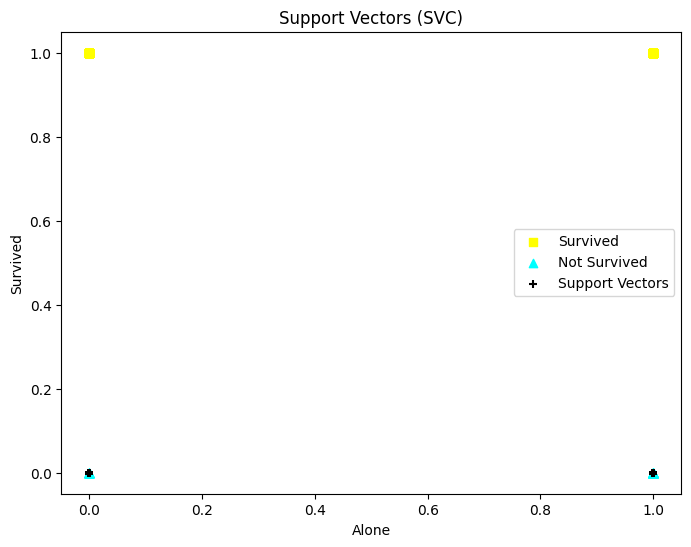

In [65]:
# Visualize Support Vectors
# Create data for charting - input target yes and input target no
survived = X_test.loc[y_test == 1, 'alone']
not_survived = X_test.loc[y_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

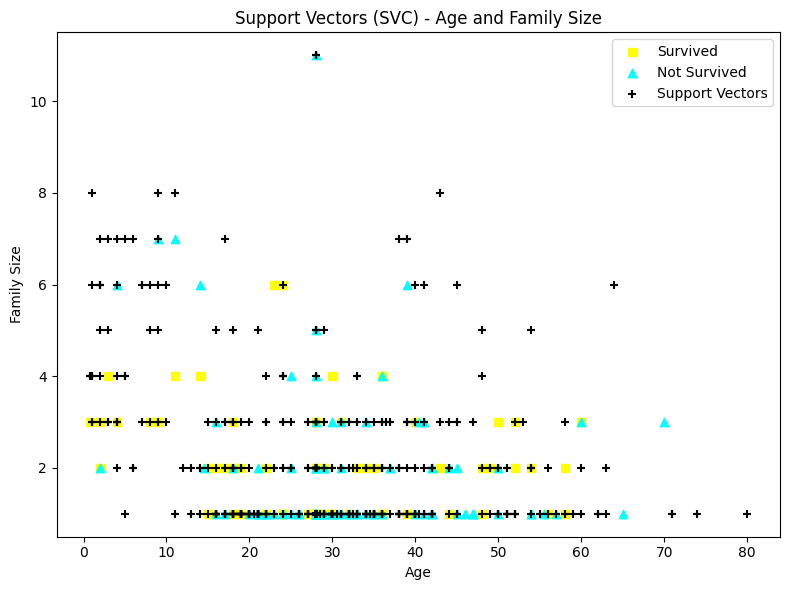

In [81]:
# For 2 features
# Create data for charting - input target yes and input target no
survived_fs = X_test.loc[y_test == 1, ['age', 'family_size']]
not_survived_fs = X_test.loc[y_test == 0, ['age', 'family_size']]

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_fs['age'], survived_fs['family_size'], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_fs['age'], not_survived_fs['family_size'], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    # Extract support vectors for both age and family_size
    support_x = svc_model.support_vectors_[:, 0]  # Age (first feature)
    support_y = svc_model.support_vectors_[:, 1]  # Family size (second feature)
    
    # Plot support vectors
    plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')

# Add title, labels, and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.legend()
plt.title('Support Vectors (SVC) - Age and Family Size')

# Show the plot
plt.tight_layout()
plt.show()


### Repeat for All 3 Cases for Each Kernel Type

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (RBF Kernel)** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                    | Case 2 | age | 63% | 66% | 63% | 52% | - |
|                    | Case 3 | age + family_size | 63% | 66% | 63% | 52% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Linear Kernel)** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                    | Case 2 | age | 63% | 66% | 63% | 52% | - |
|                    | Case 3 | age + family_size | 63% | 66% | 63% | 52% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Poly Kernel)** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                    | Case 2 | age | 63% | 66% | 63% | 52% | - |
|                    | Case 3 | age + family_size | 63% | 66% | 63% | 52% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Sigmoid Kernel)** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                    | Case 2 | age | 63% | 66% | 63% | 52% | - |
|                    | Case 3 | age + family_size | 63% | 66% | 63% | 52% | - |

### 5.2 Train and Evaluate Model (NN MLP)
Use the NN (Multi Level Perceptron ) model. Give the neural net as much information as possible, but understand that it could overfit on the extra data. For the other models I just let them run with their defaults. Here I am going to use 3 hidden layers and change up the solver to one that is more likely to give good results for a small data set.

- Train a neural network model.
- Predict and evaluate Neural Network model.
- Plot confusion matrix.

In [82]:
# Create neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs', max_iter=500)
# Train the model
nn_model.fit(X_train, y_train) 
# Confirm model is trained
print(f"Number of iterations: {nn_model.n_iter_}")

Number of iterations: 460


In [83]:
# Predict the model
y_pred_nn = nn_model.predict(X_test)
# Evaluate the model
print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       110
           1       0.63      0.45      0.53        69

    accuracy                           0.69       179
   macro avg       0.67      0.64      0.65       179
weighted avg       0.68      0.69      0.67       179



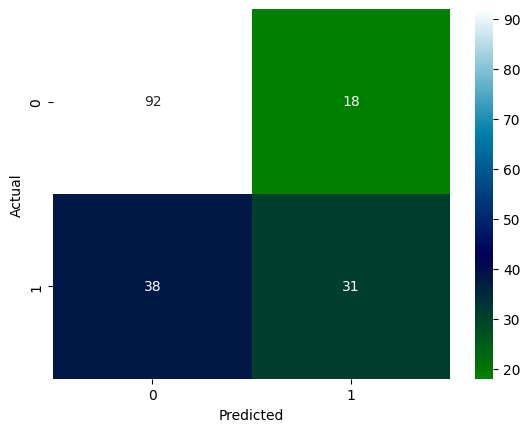

In [84]:
# Create confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
# Create heatmap
sns.heatmap(cm_nn, annot=True, cmap='ocean')
# Labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Show the plot
plt.tight_layout
plt.show()

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Neural Network (MLP)** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                    | Case 2 | age | 62% | 64% | 62% | 49% | - |
|                    | Case 3 | age + family_size | 69% | 68% | 69% | 67% | - |

### Reflection 5:
1. How well did each model perform? **Case 3 (age + family_size) had the performance, showing that adding family size improved prediction. Case 1 (alone) had a moderate performance. And Case 3 (age) had a lower accuracy and F1 score, indicating potential issues with class balance or model fit.**
2. Are there any surprising results? **Case 2's drop in F-1 score, this is the lowest number out of the entire project. Case 3's significant boost, the previous models didn't indicate that adding family_size improved prediction.**
3. Why might one model outperform the others? **Model complexity, MLP can struggle when features are limited. Data distribution, if the dataset is imbalanced, features like age alone may lead to poor recall and F1-score. Scaling issues, standardizing numerical values often improves neural network training.**

****

## Section 6. Final Thoughts & Insights
## 6.1 Summarize Findings


## 6.2 Discuss Challenges Faced


## 6.3 Next Steps
